In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
path='/gdrive/My Drive/Machine learning/'

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
members=pd.read_csv(path+"members.csv")
songs_extra_info=pd.read_csv(path+"song_extra_info.csv")
songs=pd.read_csv(path+"songs.csv")
train=pd.read_csv(path+"train.csv")
test=pd.read_csv(path+"test.csv")
sample_submission=pd.read_csv(path+"sample_submission.csv")

In [ ]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
members.shape

(34403, 7)

In [ ]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [ ]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

In [ ]:
members.dropna(inplace=True)

In [ ]:
members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

In [ ]:
members.dtypes

msno                      object
city                       int64
bd                         int64
gender                    object
registered_via             int64
registration_init_time     int64
expiration_date            int64
dtype: object

In [ ]:
songs_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
1048570,9IWSYOb4iwt4HQwiYZHogHJ8x/D+WfzJ+TqDm6furwc=,Fanfare Royale,GBCRL1100130
1048571,t1vq3y9JHURWs51aK5iT+PiwS4mERjxj2fQW16/xliY=,Sunset,PLL431688926
1048572,2MpU7KNxhakVbZ6RgrTdq6Tr3hEtCCskH1dBUMwfRgA=,Super Mario Kart - Ghost Valley,AUXN21415808
1048573,O/E6/qwfVrHxKDQbQa2q2KphIsPZ3iVX/0UgYxTCrok=,Let It Be,USA371357737


In [ ]:
songs_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [ ]:
songs_extra_info.shape

(1048575, 3)

In [ ]:
songs_extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   song_id  1048575 non-null  object
 1   name     1048573 non-null  object
 2   isrc     967252 non-null   object
dtypes: object(3)
memory usage: 24.0+ MB


In [ ]:
songs_extra_info.isnull().sum()

song_id        0
name           2
isrc       81323
dtype: int64

In [ ]:
songs_extra_info.dropna(inplace=True)
songs_extra_info.isnull().sum()

song_id    0
name       0
isrc       0
dtype: int64

In [ ]:
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
1048570,2ZRF6vTIjeJOFG0QOvQE+9L2Uhzo7prCVNIa0sBqIbA=,182044,NaN,Dragonbay,NaN,NaN,52.0
1048571,k0TIUBzWIi7l7XYyj3YRSvLVuLJ1y1z/v/LYRKpYvVg=,470158,1152|947,Massage Tribe,NaN,NaN,-1.0
1048572,+FyGIHSC23kAAF4UeTku3oquYaFYH21OWHy+eNKpNoQ=,360559,958,Antonio Vivaldi| Wolfgang Amadeus Mozart| Ludw...,Antonio Vivaldi,NaN,-1.0
1048573,LW/HYg6lUeKFxJh/0DwaivmohvW7Mwh14sWQ4dA1riU=,767652,958,Sviatoslav Richter,NaN,NaN,-1.0


In [ ]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [ ]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   song_id      1048575 non-null  object 
 1   song_length  1048575 non-null  int64  
 2   genre_ids    1011299 non-null  object 
 3   artist_name  1048575 non-null  object 
 4   composer     570554 non-null   object 
 5   lyricist     188366 non-null   object 
 6   language     1048574 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 56.0+ MB


In [ ]:
songs.isnull().sum()

song_id             0
song_length         0
genre_ids       37276
artist_name         0
composer       478021
lyricist       860209
language            1
dtype: int64

In [ ]:
songs.dropna(inplace=True)
songs.isnull().sum()


song_id        0
song_length    0
genre_ids      0
artist_name    0
composer       0
lyricist       0
language       0
dtype: int64

In [ ]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
...,...,...,...,...,...,...
1048570,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0
1048571,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1
1048572,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1
1048573,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1


In [ ]:
train.head()


,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [ ]:
train.shape

(1048575, 6)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   msno                1048575 non-null  object
 1   song_id             1048575 non-null  object
 2   source_system_tab   1045469 non-null  object
 3   source_screen_name  1000397 non-null  object
 4   source_type         1045873 non-null  object
 5   target              1048575 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [ ]:
train.dropna(inplace=True)
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [ ]:
test

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio
...,...,...,...,...,...,...
1048570,1048570,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WGGGNQ/g+Z+3CvYBSiL5PAXI8MqNApAT+skNJiHm1mE=,discover,Album more,album
1048571,1048571,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,Ka7MiMDNrrXKDOF468tyHz2c6aruoe4K4YH9O21kIrM=,discover,Album more,album
1048572,1048572,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,WnX1xlQ8vaDlSal2wzPiJYfaJZex76ya7wvlphajEOU=,discover,Album more,album
1048573,1048573,J2a1D0MldMzdUZh99b2V5HQCtAl0bWnWSp45HSU/YH0=,CSpYNBusxUao3QvX8hb7kse7X9o7d/QDE3NPlydjLqI=,discover,Album more,album


In [ ]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [ ]:
test.shape

(1048575, 6)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column              Non-Null Count    Dtype 
---  ------              --------------    ----- 
 0   id                  1048575 non-null  int64 
 1   msno                1048575 non-null  object
 2   song_id             1048575 non-null  object
 3   source_system_tab   1045122 non-null  object
 4   source_screen_name  985099 non-null   object
 5   source_type         1045571 non-null  object
dtypes: int64(1), object(5)
memory usage: 48.0+ MB


In [ ]:
test.isnull().sum()

id                        0
msno                      0
song_id                   0
source_system_tab      3453
source_screen_name    63476
source_type            3004
dtype: int64

In [ ]:
test.dropna(inplace=True)
test.isnull().sum()

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64

In [ ]:
print(f"songs has {songs.shape[0]} rows and {songs.shape[1]} columns")
print(f"songs_extra_info  has {songs_extra_info.shape[0]} rows and {songs_extra_info.shape[1]} columns")
print(f"members has {members.shape[0]} rows and {members.shape[1]} columns")
print(f"sample_submission  has {sample_submission.shape[0]} rows and {sample_submission.shape[1]} columns")
print(f"train has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"test has {test.shape[0]} rows and {test.shape[1]} columns")

songs has 178652 rows and 7 columns
songs_extra_info  has 967251 rows and 3 columns
members has 14501 rows and 7 columns
sample_submission  has 1048575 rows and 2 columns
train has 999985 rows and 6 columns
test has 984474 rows and 6 columns


In [ ]:
print("Columns present in songs_data:")
for columns in songs.columns:
    print(columns)

Columns present in songs_data:
song_id
song_length
genre_ids
artist_name
composer
lyricist
language


In [ ]:
print(f"No of records : {songs.shape[0]}")
print(f"Count of distinct song lengths : {len(songs.song_length.unique())}")
print(f"Count of distinct genre ids : {len(songs.genre_ids.unique())}")
print(f"Count of distinct artist name : {len(songs.artist_name.unique())}")
print(f"Count of distinct composer : {len(songs.composer.unique())}")
print(f"Count of distinct lyricist : {len(songs.lyricist.unique())}")
print(f"Count of distinct languages : {len(songs.language.unique())}")

No of records : 178652
Count of distinct song lengths : 51585
Count of distinct genre ids : 476
Count of distinct artist name : 21616
Count of distinct composer : 67777
Count of distinct lyricist : 66442
Count of distinct languages : 10


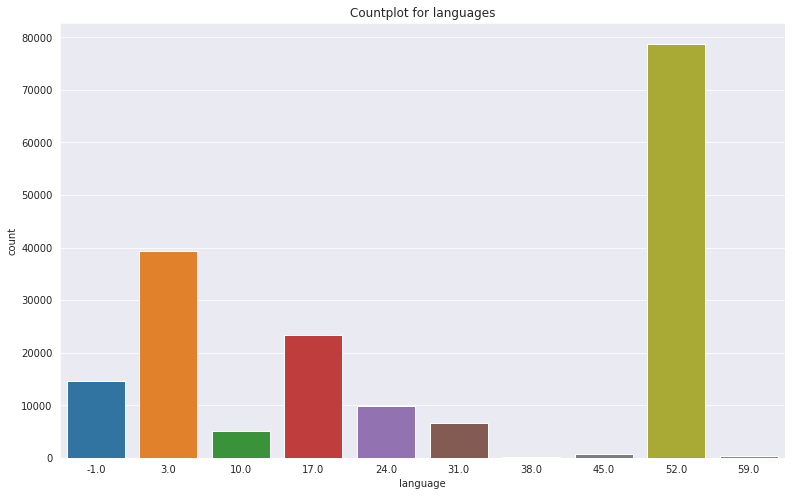

In [ ]:
plt.figure(figsize = (13, 8))
sns.set_style("darkgrid")
ax = sns.countplot(x = songs.language, data = songs.language)
ax.set_title("Countplot for languages")
plt.show()

In [ ]:
print("Columns present in songs_extra_info are:")
for columns in songs_extra_info.columns:
    print(columns)

Columns present in songs_extra_info are:
song_id
name
isrc


In [ ]:
songs_extra_info.isnull().sum()

song_id    0
name       0
isrc       0
dtype: int64

In [ ]:
songs_extra_info.dropna(inplace=True)
songs_extra_info.isnull().sum()

song_id    0
name       0
isrc       0
dtype: int64

In [ ]:
print("Columns present in members are:")
for columns in members.columns:
    print(columns)

Columns present in members are:
msno
city
bd
gender
registered_via
registration_init_time
expiration_date


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for gender')

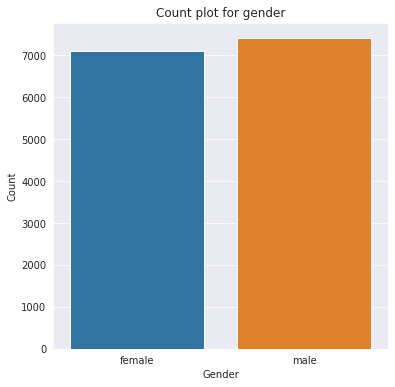

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(members['gender'], data=members)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot for gender')

In [ ]:
members.isnull().sum()

msno                      0
city                      0
bd                        0
gender                    0
registered_via            0
registration_init_time    0
expiration_date           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot forRegistation Method')

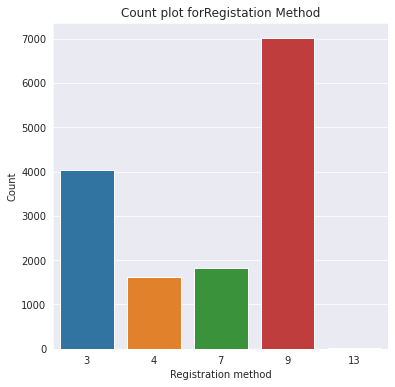

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(members['registered_via'], data=members)
plt.xlabel('Registration method')
plt.ylabel('Count')
plt.xticks(rotation='0')
plt.title('Count plot forRegistation Method')

In [ ]:
print(f"Total no of records : {train.shape[0]}")

Total no of records : 999985


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count plot for system tab')

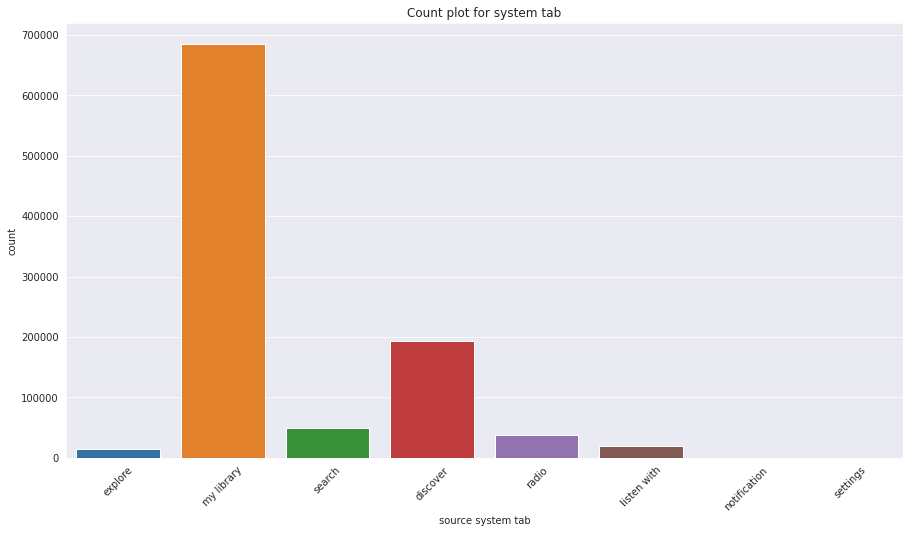

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(train['source_system_tab'],data=train)
plt.xlabel('source system tab')
plt.ylabel('count')
plt.xticks(rotation='45')
plt.title('Count plot for system tab')

In [ ]:
train.isnull().sum()

msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
target                0
dtype: int64

In [ ]:
train['source_system_tab'].fillna('my library',inplace=True)
train['source_type'].fillna('local-library',inplace=True)
train['source_screen_name'].fillna('Local playlist',inplace=True)

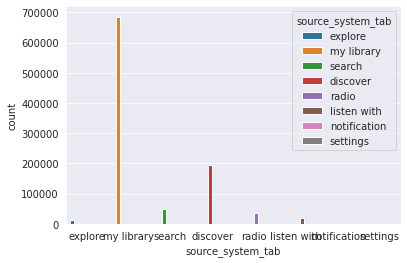

In [ ]:
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

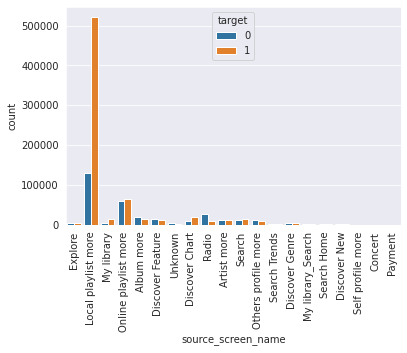

In [ ]:
sns.countplot(x = train['source_screen_name'],hue=train['target'],data = train,orient='h')
plt.xticks(rotation =90)
plt.show()

In [ ]:
merged_songs = pd.merge(songs, songs_extra_info, on ='song_id' ,how='left')
merged_train_members = pd.merge(train, members, on ='msno' ,how='left')
train = pd.merge(merged_train_members, merged_songs, on ='song_id' ,how='left')

In [ ]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13.0,24.0,female,9.0,20110525.0,20170911.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999980,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,my library,Local playlist more,local-library,0,NaN,NaN,NaN,NaN,NaN,NaN,243072.0,458,陳楚生&SPY.C (Chen Chusheng&SPY.C),陳楚生\陶華\王棟,王耀光,3.0,秘密 (Secret),TWAE31600818
999981,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,discover,Discover Chart,online-playlist,1,13.0,55.0,female,7.0,20110730.0,20170922.0,191930.0,1011,Old Dominion,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,52.0,Song for Another Time,USRN11501126
999982,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,discover,Discover Chart,online-playlist,1,13.0,55.0,female,7.0,20110730.0,20170922.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999983,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,discover,Online playlist more,online-playlist,1,5.0,29.0,female,9.0,20070607.0,20171221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
train.shape

(999985, 20)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999985 entries, 0 to 999984
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    999985 non-null  object 
 1   song_id                 999985 non-null  object 
 2   source_system_tab       999985 non-null  object 
 3   source_screen_name      999985 non-null  object 
 4   source_type             999985 non-null  object 
 5   target                  999985 non-null  int64  
 6   city                    605645 non-null  float64
 7   bd                      605645 non-null  float64
 8   gender                  605645 non-null  object 
 9   registered_via          605645 non-null  float64
 10  registration_init_time  605645 non-null  float64
 11  expiration_date         605645 non-null  float64
 12  song_length             476722 non-null  float64
 13  genre_ids               476722 non-null  object 
 14  artist_name         

In [ ]:
df = train

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
source_system_tab = encoder.fit_transform(df['source_system_tab'])
source_screen_name = encoder.fit_transform(df['source_screen_name'])
source_type = encoder.fit_transform(df['source_type'])
gender	= encoder.fit_transform(df['gender'])
artist_name = encoder.fit_transform(df['artist_name'])
name = encoder.fit_transform(df['name'])
genre_ids = encoder.fit_transform(df['genre_ids'])

In [ ]:
df['source_system_tab'] = source_system_tab
df['source_screen_name'] = source_screen_name
df['source_type'] = source_type
df['gender'] = gender
df['artist_name'] = artist_name
df['name'] = name
df['genre_ids'] = genre_ids
df

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,1,7,5,1,NaN,NaN,2,NaN,NaN,NaN,NaN,159,4508,NaN,NaN,NaN,17884,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,159,4508,NaN,NaN,NaN,17884,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,159,4508,NaN,NaN,NaN,17884,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,3,8,4,1,13.0,24.0,0,9.0,20110525.0,20170911.0,NaN,159,4508,NaN,NaN,NaN,17884,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,1,7,5,1,NaN,NaN,2,NaN,NaN,NaN,NaN,159,4508,NaN,NaN,NaN,17884,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999980,xF+utWsPHfbvt60HOgU/ZYQ0HnboeyRf0UXo5pPyP0Q=,gLwsZgboyA4rhNmspKQpnvdsLFdv4fzQMBkcdvnCfk8=,3,8,3,0,NaN,NaN,2,NaN,NaN,NaN,243072.0,97,4280,陳楚生\陶華\王棟,王耀光,3.0,15435,TWAE31600818
999981,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,iUYmqmX3CXBXzFIn2RiJLMLnwZ3/TSYhf9NDuZGqCBg=,0,3,5,1,13.0,55.0,0,7.0,20110730.0,20170922.0,191930.0,1,1648,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,Trevor Rosen|Matthew Ramsey|Brad Tursi|Matt Je...,52.0,5820,USRN11501126
999982,P3obZgg2TmWGlUbGb7rz/G2CCX7cpYJ691Iyvfv2j4g=,IKoZne4v1VzCh7r0lVmOn1hOUdTMkAiniHnKELDq8es=,0,3,5,1,13.0,55.0,0,7.0,20110730.0,20170922.0,NaN,159,4508,NaN,NaN,NaN,17884,NaN
999983,FBn5lX1m8BNAFevy7oiAe8JBxi20akyXBW7zG0MBVbQ=,T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=,0,11,5,1,5.0,29.0,0,9.0,20070607.0,20171221.0,NaN,159,4508,NaN,NaN,NaN,17884,NaN
